<div class="alert alert-block alert-info">
Nanyang Technological University<br>
<i>CZ1115 Data Science and Artifical Intelligence</i>, 20/21 Sem 2
    

FSP4 - Alpha Vantage Dataset<br>
    
Tejas Rajagopal (TEJAS006@e.ntu.edu.sg)<br>
Arushi Bansal(ARUSHI003@e.ntu.edu.sg)<br>
Raghav Nair(RAGHAV004@e.ntu.edu.sg)<br>
</div>

# Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pprint import pprint
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

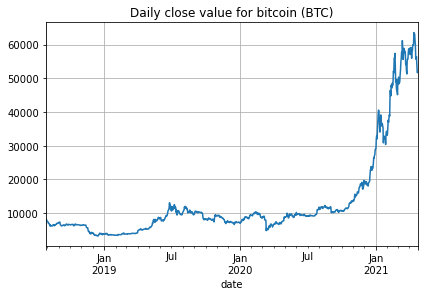

In [2]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key='QF4VJRW3HTAIC4YA', output_format='pandas')
crypto_data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
crypto_data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

The csv file used below is extracted from **Alpha Vantage**'s datset.

In [3]:
closing_marketcap_data=pd.read_csv('cleaned_data.csv')
closing_marketcap_data

,timestamp,BTC close(USD),BTC mktcap(USD),ETH close(USD),ETH mktcap(USD),BNB close(USD),BNB mktcap(USD),XRP close(USD),XRP mktcap(USD),ADA close(USD),...,LTC close(USD),LTC mktcap(USD),XLM close(USD),XLM mktcap(USD),EOS close(USD),EOS mktcap(USD),QTUM close(USD),QTUM mktcap(USD),TRX close(USD),TRX mktcap(USD)
0,2021-04-21,56395.68,1609.784422,2350.71,4.141744e+04,576.7544,426547.695,1.40664,3.694768e+07,1.26773,...,267.23,6.471902e+04,0.52482,1.545602e+07,6.7764,1835882.92,16.727,5.449617e+05,0.13405,9.648337e+07
1,2021-04-20,56425.00,72744.482151,2330.03,9.922408e+05,586.3635,5730895.325,1.38501,1.522196e+09,1.26689,...,260.68,2.111225e+06,0.52877,2.780045e+08,6.6944,43365500.85,17.496,7.424156e+06,0.13279,3.116151e+09
2,2021-04-19,55633.14,78229.042267,2161.12,8.205923e+05,504.0322,5031325.713,1.30945,1.608074e+09,1.19450,...,261.38,1.973512e+06,0.49982,3.127502e+08,6.6005,54389682.92,18.299,1.541662e+07,0.12993,3.094362e+09
3,2021-04-18,56150.01,124882.131824,2235.64,1.475384e+06,481.4367,4468597.460,1.40797,2.048345e+09,1.27693,...,273.36,3.346590e+06,0.54459,4.554186e+08,7.2854,84548001.96,18.380,1.113304e+07,0.14302,4.773187e+09
4,2021-04-17,60006.66,58912.256128,2317.60,6.242323e+05,514.6861,2949040.221,1.53896,1.108826e+09,1.36802,...,300.86,2.574520e+06,0.59137,2.635210e+08,7.7859,59682689.57,17.246,5.098480e+06,0.15535,4.516595e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-07-31,7730.93,48296.915587,432.22,2.149136e+05,13.8369,1908469.580,0.43530,3.178509e+07,0.14175,...,78.69,1.579118e+05,0.27693,3.756175e+07,7.3317,10844162.96,6.850,2.987420e+05,0.03373,9.683381e+08
996,2018-07-30,8173.92,39692.416542,456.23,1.795818e+05,13.1666,1214311.900,0.44534,3.214160e+07,0.15327,...,82.18,1.469471e+05,0.29466,3.773210e+07,7.7421,11922994.36,7.396,2.548611e+05,0.03635,7.256684e+08
997,2018-07-29,8211.00,25531.226185,466.40,1.387476e+05,13.9569,1627537.900,0.45315,3.118871e+07,0.16268,...,83.85,1.195128e+05,0.30793,2.459564e+07,8.3148,11644873.39,7.729,5.785929e+04,0.03905,7.387377e+08
998,2018-07-28,8225.04,26215.173839,469.29,1.568626e+05,14.6690,2191526.040,0.45641,2.784335e+07,0.16410,...,84.07,1.249745e+05,0.31500,2.956113e+07,8.3523,12344279.70,7.757,6.543259e+04,0.03690,7.839639e+08


In [4]:
closingval_marketcap_df = closing_marketcap_data.iloc[1: , :] #Removing the first row of the dataset
closingval_marketcap_df

,timestamp,BTC close(USD),BTC mktcap(USD),ETH close(USD),ETH mktcap(USD),BNB close(USD),BNB mktcap(USD),XRP close(USD),XRP mktcap(USD),ADA close(USD),...,LTC close(USD),LTC mktcap(USD),XLM close(USD),XLM mktcap(USD),EOS close(USD),EOS mktcap(USD),QTUM close(USD),QTUM mktcap(USD),TRX close(USD),TRX mktcap(USD)
1,2021-04-20,56425.00,72744.482151,2330.03,9.922408e+05,586.3635,5730895.325,1.38501,1.522196e+09,1.26689,...,260.68,2.111225e+06,0.52877,2.780045e+08,6.6944,43365500.85,17.496,7.424156e+06,0.13279,3.116151e+09
2,2021-04-19,55633.14,78229.042267,2161.12,8.205923e+05,504.0322,5031325.713,1.30945,1.608074e+09,1.19450,...,261.38,1.973512e+06,0.49982,3.127502e+08,6.6005,54389682.92,18.299,1.541662e+07,0.12993,3.094362e+09
3,2021-04-18,56150.01,124882.131824,2235.64,1.475384e+06,481.4367,4468597.460,1.40797,2.048345e+09,1.27693,...,273.36,3.346590e+06,0.54459,4.554186e+08,7.2854,84548001.96,18.380,1.113304e+07,0.14302,4.773187e+09
4,2021-04-17,60006.66,58912.256128,2317.60,6.242323e+05,514.6861,2949040.221,1.53896,1.108826e+09,1.36802,...,300.86,2.574520e+06,0.59137,2.635210e+08,7.7859,59682689.57,17.246,5.098480e+06,0.15535,4.516595e+09
5,2021-04-16,61334.80,91764.139884,2422.67,9.991638e+05,508.2743,4192218.462,1.54805,1.805451e+09,1.40989,...,308.43,3.150448e+06,0.61005,3.762251e+08,8.4974,84992024.62,18.348,9.321674e+06,0.16091,6.725692e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-07-31,7730.93,48296.915587,432.22,2.149136e+05,13.8369,1908469.580,0.43530,3.178509e+07,0.14175,...,78.69,1.579118e+05,0.27693,3.756175e+07,7.3317,10844162.96,6.850,2.987420e+05,0.03373,9.683381e+08
996,2018-07-30,8173.92,39692.416542,456.23,1.795818e+05,13.1666,1214311.900,0.44534,3.214160e+07,0.15327,...,82.18,1.469471e+05,0.29466,3.773210e+07,7.7421,11922994.36,7.396,2.548611e+05,0.03635,7.256684e+08
997,2018-07-29,8211.00,25531.226185,466.40,1.387476e+05,13.9569,1627537.900,0.45315,3.118871e+07,0.16268,...,83.85,1.195128e+05,0.30793,2.459564e+07,8.3148,11644873.39,7.729,5.785929e+04,0.03905,7.387377e+08
998,2018-07-28,8225.04,26215.173839,469.29,1.568626e+05,14.6690,2191526.040,0.45641,2.784335e+07,0.16410,...,84.07,1.249745e+05,0.31500,2.956113e+07,8.3523,12344279.70,7.757,6.543259e+04,0.03690,7.839639e+08


In [5]:
closingval_marketcap_df.describe()

,BTC close(USD),BTC mktcap(USD),ETH close(USD),ETH mktcap(USD),BNB close(USD),BNB mktcap(USD),XRP close(USD),XRP mktcap(USD),ADA close(USD),ADA mktcap(USD),LTC close(USD),LTC mktcap(USD),XLM close(USD),XLM mktcap(USD),EOS close(USD),EOS mktcap(USD),QTUM close(USD),QTUM mktcap(USD),TRX close(USD),TRX mktcap(USD)
count,999.000000,999.000000,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02,999.000000,9.990000e+02
mean,12945.750170,56556.019783,395.126236,6.508535e+05,39.566537,2.671127e+06,0.332693,3.175757e+08,0.159477,3.017942e+08,74.576797,6.432065e+05,0.138545,1.492318e+08,3.750056,1.347784e+07,3.027309,2.220465e+06,0.025708,1.197060e+09
std,13230.806378,35685.775219,473.792132,5.130460e+05,79.037333,1.870445e+06,0.172908,6.243136e+08,0.284980,2.986557e+08,47.493302,6.807294e+05,0.111975,2.391247e+08,1.387485,1.479448e+07,2.202543,3.409096e+06,0.017789,1.312352e+09
min,3211.720000,5743.933728,83.760000,4.439483e+04,4.516000,4.103042e+05,0.135490,2.398929e+07,0.023290,2.540792e+07,23.080000,3.528840e+04,0.031740,5.637974e+06,1.727100,7.494952e+05,1.039000,5.504024e+04,0.008410,1.225593e+08
25%,6528.485000,32549.164939,165.865000,2.989347e+05,13.672250,1.431739e+06,0.240405,6.490403e+07,0.043750,1.220708e+08,45.425000,2.199738e+05,0.069650,3.431878e+07,2.650700,5.726764e+06,1.942500,3.722381e+05,0.016635,5.311060e+08
50%,8841.180000,47788.050050,217.810000,5.173516e+05,18.555500,2.329453e+06,0.297570,1.214666e+08,0.073110,2.128236e+08,57.700000,3.823603e+05,0.094980,7.730522e+07,3.266400,8.648158e+06,2.376000,1.033526e+06,0.022780,8.130184e+08
75%,11100.070000,70690.774965,365.065000,8.443907e+05,28.516450,3.271653e+06,0.372535,2.624926e+08,0.105750,3.536033e+08,81.715000,7.695297e+05,0.164850,1.713928e+08,4.636800,1.458956e+07,3.288500,2.863258e+06,0.027185,1.358341e+09
max,63575.000000,402201.673764,2514.040000,4.663240e+06,596.710400,2.018886e+07,1.834680,8.608358e+09,1.478200,2.059110e+09,308.430000,4.989529e+06,0.657010,3.305718e+09,8.564500,1.233770e+08,18.380000,4.267873e+07,0.164210,1.451407e+10


In [6]:
closingval_df=closingval_marketcap_df.drop(['BTC mktcap(USD)','ETH mktcap(USD)','BNB mktcap(USD)','XRP mktcap(USD)','ADA mktcap(USD)','LTC mktcap(USD)','XLM mktcap(USD)','EOS mktcap(USD)','QTUM mktcap(USD)','TRX mktcap(USD)'],axis=1)

In [7]:
closingval_df
closingval_df.describe() #Displaying relevant statistics of closing values

,BTC close(USD),ETH close(USD),BNB close(USD),XRP close(USD),ADA close(USD),LTC close(USD),XLM close(USD),EOS close(USD),QTUM close(USD),TRX close(USD)
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,12945.750170,395.126236,39.566537,0.332693,0.159477,74.576797,0.138545,3.750056,3.027309,0.025708
std,13230.806378,473.792132,79.037333,0.172908,0.284980,47.493302,0.111975,1.387485,2.202543,0.017789
min,3211.720000,83.760000,4.516000,0.135490,0.023290,23.080000,0.031740,1.727100,1.039000,0.008410
25%,6528.485000,165.865000,13.672250,0.240405,0.043750,45.425000,0.069650,2.650700,1.942500,0.016635
50%,8841.180000,217.810000,18.555500,0.297570,0.073110,57.700000,0.094980,3.266400,2.376000,0.022780
75%,11100.070000,365.065000,28.516450,0.372535,0.105750,81.715000,0.164850,4.636800,3.288500,0.027185
max,63575.000000,2514.040000,596.710400,1.834680,1.478200,308.430000,0.657010,8.564500,18.380000,0.164210


**Normalized Standard Deviation** is the standard deviation divided by the mean. This results in a standard deviation value that is independent of its units. For example, this would allow us to compare the standard deviation of Bitcoin and Ethereum, although their values are vastly different. Calculating the normalized standard deviation helps us gain insights into the **volatility of cryptocurrencies.**

In [8]:
normalized_std=[]
normalized_std=closingval_df.std()/closingval_df.mean()

In [9]:
normalized_std

BTC close(USD)     1.022019
ETH close(USD)     1.199091
BNB close(USD)     1.997580
XRP close(USD)     0.519721
ADA close(USD)     1.786971
LTC close(USD)     0.636838
XLM close(USD)     0.808221
EOS close(USD)     0.369990
QTUM close(USD)    0.727558
TRX close(USD)     0.691977
dtype: float64

In [10]:
closingval_df

,timestamp,BTC close(USD),ETH close(USD),BNB close(USD),XRP close(USD),ADA close(USD),LTC close(USD),XLM close(USD),EOS close(USD),QTUM close(USD),TRX close(USD)
1,2021-04-20,56425.00,2330.03,586.3635,1.38501,1.26689,260.68,0.52877,6.6944,17.496,0.13279
2,2021-04-19,55633.14,2161.12,504.0322,1.30945,1.19450,261.38,0.49982,6.6005,18.299,0.12993
3,2021-04-18,56150.01,2235.64,481.4367,1.40797,1.27693,273.36,0.54459,7.2854,18.380,0.14302
4,2021-04-17,60006.66,2317.60,514.6861,1.53896,1.36802,300.86,0.59137,7.7859,17.246,0.15535
5,2021-04-16,61334.80,2422.67,508.2743,1.54805,1.40989,308.43,0.61005,8.4974,18.348,0.16091
...,...,...,...,...,...,...,...,...,...,...,...
995,2018-07-31,7730.93,432.22,13.8369,0.43530,0.14175,78.69,0.27693,7.3317,6.850,0.03373
996,2018-07-30,8173.92,456.23,13.1666,0.44534,0.15327,82.18,0.29466,7.7421,7.396,0.03635
997,2018-07-29,8211.00,466.40,13.9569,0.45315,0.16268,83.85,0.30793,8.3148,7.729,0.03905
998,2018-07-28,8225.04,469.29,14.6690,0.45641,0.16410,84.07,0.31500,8.3523,7.757,0.03690


In [11]:
closingval_df=closingval_df.loc[::-1].reset_index(drop = True) #Rearranging rows in order of the dates
closingval_df

,timestamp,BTC close(USD),ETH close(USD),BNB close(USD),XRP close(USD),ADA close(USD),LTC close(USD),XLM close(USD),EOS close(USD),QTUM close(USD),TRX close(USD)
0,2018-07-27,8188.57,470.09,13.9919,0.45550,0.16590,84.39,0.31889,8.4321,7.878,0.03654
1,2018-07-28,8225.04,469.29,14.6690,0.45641,0.16410,84.07,0.31500,8.3523,7.757,0.03690
2,2018-07-29,8211.00,466.40,13.9569,0.45315,0.16268,83.85,0.30793,8.3148,7.729,0.03905
3,2018-07-30,8173.92,456.23,13.1666,0.44534,0.15327,82.18,0.29466,7.7421,7.396,0.03635
4,2018-07-31,7730.93,432.22,13.8369,0.43530,0.14175,78.69,0.27693,7.3317,6.850,0.03373
...,...,...,...,...,...,...,...,...,...,...,...
994,2021-04-16,61334.80,2422.67,508.2743,1.54805,1.40989,308.43,0.61005,8.4974,18.348,0.16091
995,2021-04-17,60006.66,2317.60,514.6861,1.53896,1.36802,300.86,0.59137,7.7859,17.246,0.15535
996,2021-04-18,56150.01,2235.64,481.4367,1.40797,1.27693,273.36,0.54459,7.2854,18.380,0.14302
997,2021-04-19,55633.14,2161.12,504.0322,1.30945,1.19450,261.38,0.49982,6.6005,18.299,0.12993


In [14]:
choice=int(input('''Enter which cryptocurrency you would like to forecast (Integer between 1 and 10):
      1. Bitcoin (BTC)
      2. Ethereum (ETH)
      3. Binance Coin (BNB)
      4. Ripple (XRP)
      5. Cardano (ADA)
      6. Litecoin
      7. Lumen (XLM)
      8. EOS.IO (EOS)
      9. QTUM (QTUM)
      10. TRON (TRX)\n'''))


Enter which cryptocurrency you would like to forecast (Integer between 1 and 10):
      1. Bitcoin (BTC)
      2. Ethereum (ETH)
      3. Binance Coin (BNB)
      4. Ripple (XRP)
      5. Cardano (ADA)
      6. Litecoin
      7. Lumen (XLM)
      8. EOS.IO (EOS)
      9. QTUM (QTUM)
      10. TRON (TRX)
1


In [15]:

#Contains data from 2018-07-27 to 2021-04-20
closing_val=closingval_df[closingval_df.columns[choice:choice+1]]
index = pd.date_range('27/07/2018', '20/04/2021')

closing_val=closing_val.set_index(index)
closing_val

,BTC close(USD)
2018-07-27,8188.57
2018-07-28,8225.04
2018-07-29,8211.00
2018-07-30,8173.92
2018-07-31,7730.93
...,...
2021-04-16,61334.80
2021-04-17,60006.66
2021-04-18,56150.01
2021-04-19,55633.14


In [16]:
closing_val.describe()

,BTC close(USD)
count,999.000000
mean,12945.750170
std,13230.806378
min,3211.720000
25%,6528.485000
50%,8841.180000
75%,11100.070000
max,63575.000000


In [23]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow 

     |████████████████████████████████| 173.9 MB 836 kB/s eta 0:00:011
     |████████████████████████████████| 129 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 142 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 892 kB/s eta 0:00:01
     |████████████████████████████████| 155 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 309 kB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 781 k

In [25]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D
from keras.callbacks import EarlyStopping
import datetime
from keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
dataset=closing_val.values
dataset=dataset.astype('float32')

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
dataset

array([[8.24483037e-02],
       [8.30524713e-02],
       [8.28198791e-02],
       [8.22055936e-02],
       [7.48668760e-02],
       [7.27737099e-02],
       [7.14671165e-02],
       [6.96956739e-02],
       [6.29210249e-02],
       [6.31587580e-02],
       [6.16782159e-02],
       [5.81204295e-02],
       [5.09130657e-02],
       [5.49683496e-02],
       [4.85773757e-02],
       [5.00408486e-02],
       [5.12995645e-02],
       [5.02727777e-02],
       [4.93074581e-02],
       [5.06175309e-02],
       [5.13562188e-02],
       [5.58745340e-02],
       [5.26187420e-02],
       [5.41025847e-02],
       [5.04134223e-02],
       [5.41435108e-02],
       [5.21702915e-02],
       [5.48891574e-02],
       [5.74839562e-02],
       [5.83454072e-02],
       [5.77881113e-02],
       [6.12445176e-02],
       [6.40188828e-02],
       [6.32752255e-02],
       [6.25068694e-02],
       [6.29437268e-02],
       [6.60714507e-02],
       [6.77612200e-02],
       [6.71152994e-02],
       [6.87063336e-02],


We cannot use random splitting of dataset into test and train data as the sequence of events is important for **time series.** Hence, we split our train & test data into **2/3** and **1/3**, which is 66.67% & 33.33% respectively.

In [28]:
train_size=int(len(dataset)*0.66)
test_size=len(dataset)-train_size
train,test = dataset[0:train_size],dataset[train_size:] #Splitting the dataset into test and train

In [29]:
print("Train Size:",train_size)
print("Test Size",test_size)

Train Size: 659
Test Size 340


The **to_sequences** method creates a dataset where X is the closing value of the cryptocurrency at a given time **(t, t-1, t-2...)** 
and Y is the closing value at the next time **(t + 1)**. Where **seq_size** is the number of previous time steps to use as input variables to predict the next time period.

In [30]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [31]:
seq_size = 10  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (648, 10)
Shape of test set: (329, 10)


Comparing Test Data accuracy of **Single LSTM**, **Convolutional LSTM**, **Bidirectional LSTM** and **Stacked LSTMs**.

In [32]:
#Single LSTM
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
 
#print('Single LSTM with hidden Dense Layer')
#model = Sequential()
#model.add(LSTM(64, input_shape=(None, seq_size)))
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20,
#                       verbose=1, mode='auto', restore_best_weights=True)
#model.summary()

#Bidirectional LSTM
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#
##For some sequence forecasting problems we may need LSTM to learn
## sequence in both forward and backward directions
#from keras.layers import Bidirectional
#model = Sequential()
#model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(None, seq_size)))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()

#Convolutional LSTM
#The shape of input data must be: [samples, timesteps, rows, columns, features]

trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

#Stacked LSTM with 1 hidden dense layer
# The shape of the input data must be: [samples, time steps, features]

#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
 
#model = Sequential()
#model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
#model.add(LSTM(50, activation='relu'))
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
 
#model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 64)          19200     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
21/21 - 3s - loss: 0.0013 - val_loss: 0.0700
Epoch 2/100
21/21 - 0s - loss: 4.5020e-04 - val_loss: 0.0156
Epoch 3/100
21/21 - 0s - loss: 1.5051e-04 - val_loss: 0.0023
Epoch 4/100
21/21 - 0s - loss: 1.0696e-04 - val_loss: 0.0030
Epoch 5/100
21/21 - 0s - loss: 9.8261e-05 - val_loss: 0.0020
Epoch 6/100
21/21 - 0s - loss: 9.6826e-05 - val_loss: 0.0020
Epoch 7/100
21/21 - 0s - loss: 8.7079e-05 - val_loss: 0.0018
Epoch 8/100
21/21 - 0s - loss: 8.6031e-05 - val_loss: 0.0019
Epoch 9/100
21/21 - 0s - loss: 8.2191e-05 - val_loss: 0.0016
Epoch 10/100
21/21 - 0s - loss: 7.1746e-05 - val_loss: 0.0015
Epoch 11/100
21/21 - 0s - loss: 6.4933e-05 - val_loss: 0.0016
Epoch 12/100
21/21 - 0s - loss: 6.0011e-05 - val_loss: 0.0013
Epoch 13/100
21/21 - 0s - loss: 5.5364e-05 - val_loss: 0.0012
Epoch 14/100
21/21 - 0s - loss: 5.3167e-05 - val_loss: 0.0011
Epoch 15/100
21/21 - 0s - loss: 4.6524e-05 - val_loss: 0.0011
Epoch 16/100
21/21 - 0s - loss: 4.4330e-05 - val_loss: 8.9306e-04
Epoch 17/100
21/2

In [34]:
#Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

We must invert the prediction back to prescaled values in order to compare them with the original input values. Since we used **MinMaxScaler** to **normalize** the original values, we can now use **scaler.inverse_transform** to **reverse the tranformation**(normalization).

In [35]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [36]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 362.08 RMSE
Test Score: 3339.86 RMSE


In [37]:
#Shift train predictions for plotting
#We must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

The **blue** lines represent the **actual closing values**, with the **orange** lines representing the values predicted by the neural network on the **train data**, and the **green** lines represent the values predicted by the neural network on the **test data**.

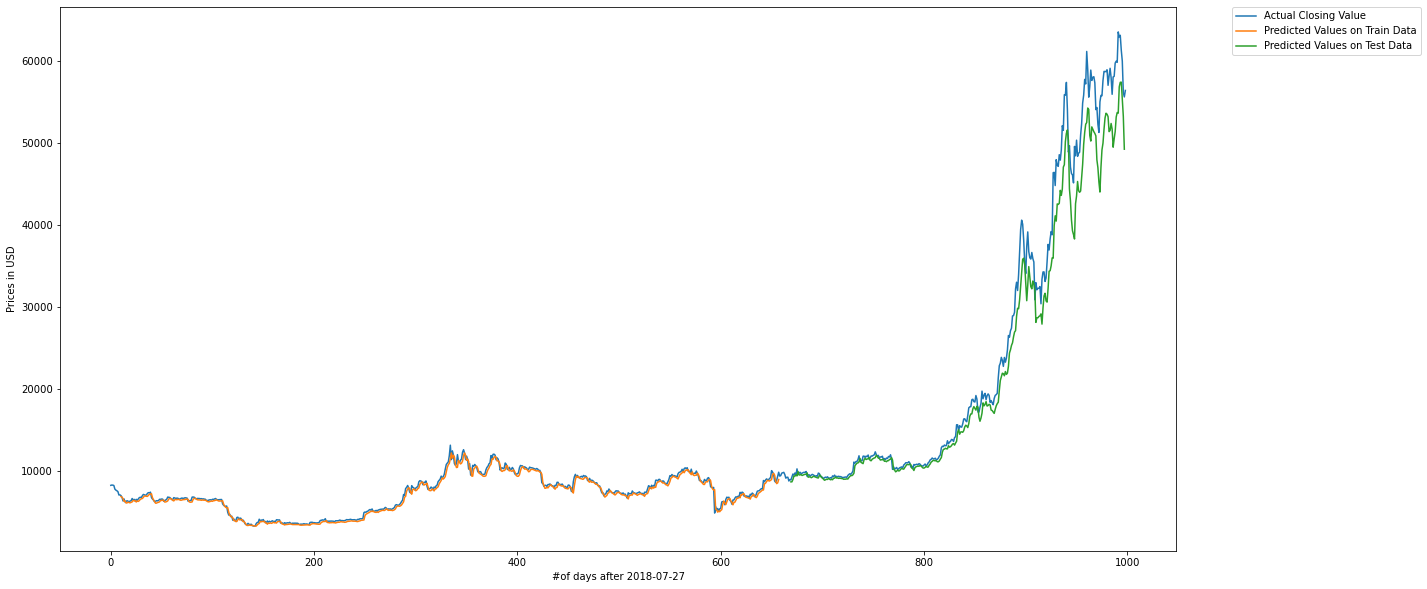

In [38]:


# plot baseline and predictions
fig, ax = plt.subplots(figsize=(20, 10))
#ax.set(xlim=["2018-07-27", "2021-04-20"])

# Define the date format
#date_form = DateFormatter("%")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.plot(scaler.inverse_transform(dataset), label="Actual Closing Value")
plt.plot(trainPredictPlot, label="Predicted Values on Train Data")
plt.plot(testPredictPlot, label="Predicted Values on Test Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('#of days after 2018-07-27')
plt.ylabel('Prices in USD')
plt.show()

Here we see that the trend of the predicted and actual values are vastly similar, although they do not perfectly overlap. We should expect this as we are only performing predictions.

Here are some of the RMSE values for the different LSTMs when experimenting with different values for the sequence size and #of epochs for **Bitcoin (BTC)**.

**Single LSTM with Hidden Dense Layer:**

`seq_size=10, epochs=100`<br>
`Train Score: 334.80 RMSE`<br>
`Test Score: 5394.96 RMSE`<br>

`seq_size=10, epochs=50`<br>
`Train Score: 347.99 RMSE`<br>
`Test Score: 3222.51 RMSE`<br>

**Convolutional LSTM:**

`seq_size=40, epochs=100`<br>
`Train Score: 324.20 RMSE`<br>
`Test Score: 3463.53 RMSE`<br>

`seq_size=10,epochs=50`<br>
`Train Score: 354.33 RMSE`<br>
`Test Score: 3981.06 RMSE`<br>

*Best Case:*

`seq_size=10, epochs=100`<br>
`Train Score: 323.22 RMSE`<br>
`Test Score: 1537.83 RMSE`<br>

**Stacked LSTMs:**

`seq_size=10,epochs=100`<br>
`Train Score: 353.35 RMSE`<br>
`Test Score: 2899.92 RMSE`<br>

`seq_size=7,epochs=100`<br>
`Train Score: 318.81 RMSE`<br>
`Test Score: 3310.89 RMSE`<br>

`seq_size=15,epochs=100`<br>
`Train Score: 392.87 RMSE`<br>
`Test Score: 4119.80 RMSE`<br>

`seq_size=10,epochs=50`<br> 
`Train Score: 339.17 RMSE`<br>
`Test Score: 2191.39 RMSE`<br>

`seq_size=10,epochs=35`<br>
`Train Score: 443.97 RMSE`<br>
`Test Score: 5269.84 RMSE`<br>

**Bi-directional LSTM:**

`seq_size=10,epochs=50`<br>
`Train Score: 354.02 RMSE`<br>
`Test Score: 2421.81 RMSE`<br>
 
`seq_size=15,epochs=50`<br>
`Train Score: 373.15 RMSE`<br>
`Test Score: 6189.28 RMSE`<br>
 
`seq_size=7,epochs=50`<br>
`Train Score: 358.74 RMSE`<br>
`Test Score: 2735.18 RMSE`<br>
 
`seq_size=10, epochs=100`<br>
`Train Score: 323.52 RMSE`<br>
`Test Score: 2654.81 RMSE`<br>

We have looked at 4 different LSTMs Neural Networks (Long-Short Term Memory): **Single LSTM**, **Convolutional LSTM**, **Bidirectional LSTM** and **Stacked LSTMs**. We compared RMSE value of test data by using these different LSTMs, along with varying the length of the sequence(seq_size) and # of epochs. From our findings, it was evident that the **Convolutional LSTM** would produce a better prediction in most cases with a sequence size of around 10 and epochs between 50-100.